In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats

sys.path.append('../../..')

In [2]:
from scripts import project_functions as pf

In [3]:
path = "/Users/nitchakan/Desktop/DATA301/project-group45-project/data/raw/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv"

df = pf.load_and_process(path)
df

,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,A108,...,ASDmean,TD_ASDdiff,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
7,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,485,142,1,113,1,7685,111,...,80.981982,20,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__Bacteroides_coprophilus
8,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,50,10,13,17,9,15,9,5,9,...,14.819820,1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminiclostridium_9,_s__uncultured_organism_g__Ruminiclostridium_9
11,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,13.396396,-12,d__Bacteria,_k__norank,_p__Firmicutes,_c__Negativicutes,_o__Selenomonadales,_f__Veillonellaceae,_g__Mitsuokella,_s__uncultured_bacterium_g__Mitsuokella
15,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,6,2,3,10,3,5,6,...,3.495495,-1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Peptostreptococcaceae,_g__Terrisporobacter,_s__uncultured_organism_g__Terrisporobacter
18,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,1,3,4,1,2,2,7,4,...,2.387387,1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Faecalibacterium,_s__unclassified_g__Faecalibacterium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,8,13,0,4,32,13,1,3,0,...,23.936937,-5,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__Bacteroides_clarus
1277,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,12,14,21,16,15,21,22,23,23,...,23.459459,2,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Lachnoclostridium,_s__[Clostridium]_symbiosum
1284,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,3.513514,-3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Negativicutes,_o__Selenomonadales,_f__Veillonellaceae,_g__Megasphaera,_s__uncultured_bacterium_g__Megasphaera
1294,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,137,176,238,242,178,94,208,54,223,...,174.216216,28,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcus_2,_s__unclassified_g__Ruminococcus_2


In [4]:
# profile=ProfileReport(df)
# ProfileReport(df).to_notebook_iframe()

In [5]:
df.describe()

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B57,B58,B59,B6,B60,B61,AllAvg,TDmean,ASDmean,TD_ASDdiff
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,82.020833,81.888021,81.539062,81.651042,81.757812,81.861979,81.669271,81.802083,81.421875,81.882812,...,82.049479,81.947917,81.328125,81.713542,82.187500,81.872396,81.635923,81.646999,81.628754,-0.013021
std,448.243715,345.704715,249.389267,357.129590,360.299420,371.414099,289.199738,454.425477,425.007214,330.451040,...,497.203401,382.880763,581.122702,340.922740,331.526261,413.945509,242.181041,254.530197,234.399520,85.117411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003968,0.000000,0.000000,-554.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.909722,3.475524,3.759009,-6.000000
50%,4.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,6.000000,4.000000,...,2.000000,3.000000,1.000000,6.000000,2.000000,2.000000,9.964286,9.479021,11.441441,-1.000000
75%,29.250000,32.250000,51.500000,40.250000,26.000000,39.000000,37.250000,33.000000,34.250000,24.000000,...,13.000000,22.000000,12.250000,33.250000,16.000000,18.500000,48.963294,47.734266,49.006757,2.000000
max,5865.000000,4808.000000,2616.000000,5839.000000,5701.000000,5758.000000,3064.000000,7685.000000,7544.000000,3742.000000,...,6360.000000,5148.000000,8602.000000,4702.000000,3696.000000,6184.000000,2864.325397,2886.741259,2833.423423,1261.000000


In [6]:
#dropping outliers

# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]

# q = df["col"].quantile(0.99)
# df = df[df.between(df.quantile(.15), df.quantile(.85))]

# def drop_numerical_outliers(df, z_thresh=3):
#     # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
#     constrains = df.select_dtypes(include=[np.number]) \
#         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
#         .all(axis=1)
#     # Drop (inplace) values set to be rejected
#     df.drop(df.index[~constrains], inplace=True)
    
    
# drop_numerical_outliers(df)


Note:

positive values = TD

negative values = ASD

### Task 3
#### **Reseach Questions**
Q1: what are the top main bacteria abundance present in ASD and TD individuals at Class and Order level?

Q2: What are the major abundance of the bacteria at the family, genus and species level?

In [7]:
# graph by phylm
dfP = (df.groupby('Phylum')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfP

,TD_ASDdiff
Phylum,
_p__Bacteroidetes,21.824176
_p__Synergistetes,2.000000
_p__Firmicutes,-4.692913
_p__Tenericutes,-6.222222
_p__Proteobacteria,-12.909091
_p__Fusobacteria,-62.000000
_p__Actinobacteria,-65.200000
_p__Verrucomicrobia,-73.000000


In [8]:
dfC = (df.groupby('Class')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfC

,TD_ASDdiff
Class,
_c__Bacteroidia,21.824176
_c__Deltaproteobacteria,3.333333
_c__Alphaproteobacteria,2.500000
_c__Synergistia,2.000000
_c__Erysipelotrichia,-1.454545
_c__Bacilli,-4.250000
_c__Clostridia,-4.509091
_c__Mollicutes,-6.222222
_c__Negativicutes,-8.789474


In [9]:
dfO = (df.groupby('Order')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfO

,TD_ASDdiff
Order,
_o__Bacteroidales,21.824176
_o__Desulfovibrionales,3.333333
_o__Rhodospirillales,2.500000
_o__Synergistales,2.000000
_o__Erysipelotrichales,-1.454545
_o__Lactobacillales,-4.250000
_o__Clostridiales,-4.509091
_o__Mollicutes_RF9,-6.222222
_o__Selenomonadales,-8.789474


In [10]:
dfF = (df.groupby('Family')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfF

,TD_ASDdiff
Family,
_f__Prevotellaceae,67.238095
_f__Bacteroidaceae,15.812500
_f__Porphyromonadaceae,8.647059
_f__Acidaminococcaceae,8.333333
_f__Desulfovibrionaceae,3.333333
_f__Clostridiaceae_1,3.000000
_f__Rhodospirillaceae,2.500000
_f__norank_o__Bacteroidales,2.000000
_f__Synergistaceae,2.000000


In [11]:
dfG = (df.groupby('Genus')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfG

,TD_ASDdiff
Genus,
_g__Prevotella_9,215.500000
_g__Megamonas,208.500000
_g__Ruminococcus_2,70.666667
_g__[Eubacterium]_rectale_group,63.000000
_g__[Eubacterium]_eligens_group,30.250000
...,...
_g__Akkermansia,-73.000000
_g__Lachnospiraceae_NK4A136_group,-73.666667
_g__Bifidobacterium,-100.666667


In [12]:
dfS = (df.groupby('Species')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfS

,TD_ASDdiff
Species,
_s__uncultured_organism_g__Prevotella_9,1261.0
_s__Bacteroides_stercoris_ATCC_43183,248.0
_s__Bacteroides_plebeius,240.0
_s__unclassified_g__Megamonas,208.5
_s__uncultured_bacterium_g__Ruminococcus_2,185.0
...,...
_s__uncultured_organism_g__Lachnospiraceae_NK4A136_group,-144.0
_s__uncultured_organism_g__Faecalibacterium,-147.0
_s__Bacteroides_uniformis,-220.0




#### To visualize the bacteria abundance in each level of the taxonomy...


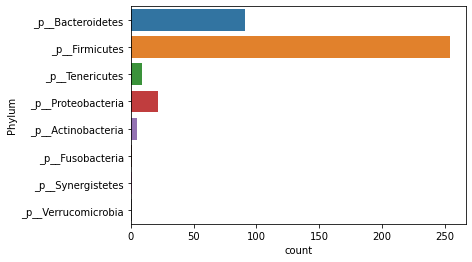

In [13]:
#can't use countplot because it doesn't show the negative values

sns.countplot(y='Phylum', data=df)
plt.show()

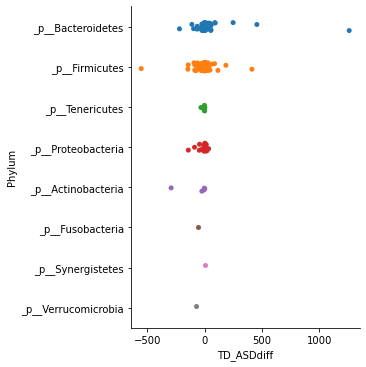

In [14]:
#i see the outliers here

sns.catplot(y="Phylum", x="TD_ASDdiff", data=df)
plt.show()

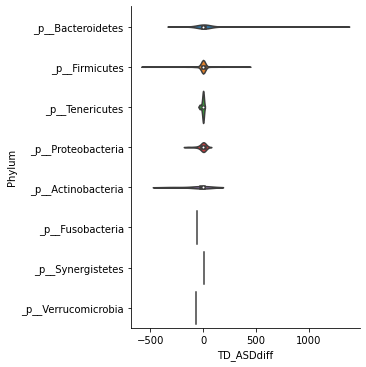

In [15]:
sns.catplot(x="TD_ASDdiff", y="Phylum", kind="violin", data=df)
plt.show()

Allthe plots above shows the relationship between the phylum and the bacteria abundance in the phylum.

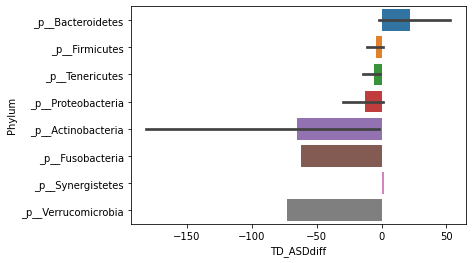

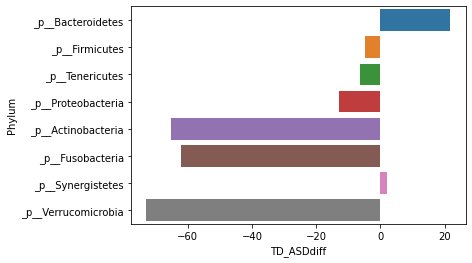

In [16]:
#plot showing the bacteria abundance in ASD and TD individuals at phylum.

# with error bars
sns.barplot(x='TD_ASDdiff', y='Phylum', data =df)
plt.show()

#without error bars
sns.barplot(x='TD_ASDdiff', y='Phylum', data =df, ci=None)
plt.show()

At the phylum level, Verrucommicrobial, Actinobacteria and Fusobacteria are more abundant in ASD individuals while Bacteroidetes is more abundant in TD individuals.

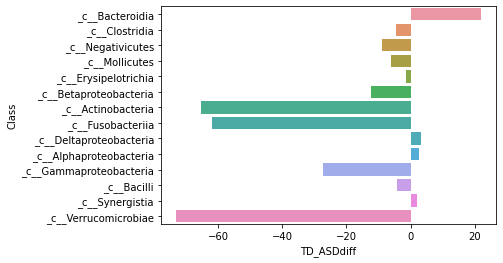

In [17]:
#bacteria abundance at Class
sns.barplot(x='TD_ASDdiff', y='Class', data =df, ci=None)
plt.show() 

At the class level, Verrucomicrobiae, Actinobacteria, Fusobacteria and Gammaproteobacteria were more abundant in ASD group while Bacteroidia was more abundant in TD group.

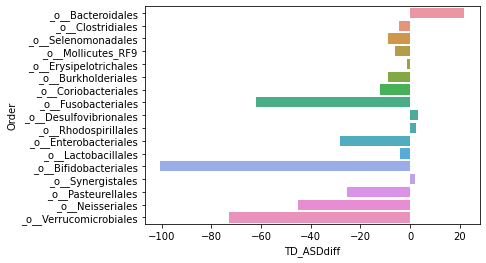

In [18]:
#bacteria abundance at Order 
sns.barplot(x='TD_ASDdiff', y='Order', data =df, ci=None)
plt.show()

At the Order level, order Bifidobacteriales(class actinobacteria), Verrucomicrobiales, Fusobacteriales, Neisseriales (class betaproteoabcteria) and Enterobacteriales were more abundant in ASD group, while Bacteroidales was more abundant in TD group. 

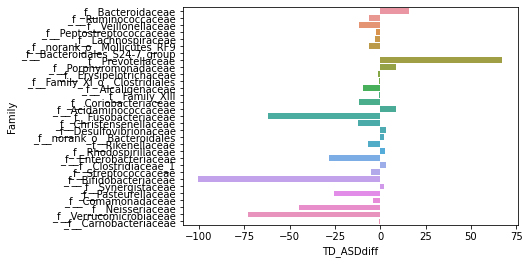

In [28]:
#bacterua abundance at Family level

sns.barplot(x='TD_ASDdiff', 
            y='Family', 
            data =df, 
            ci=None, 
           )
#             color=(df['TD_ASDdiff'] > 0).map({True: 'blue', 
#                                             False: 'red'}))
plt.show()

At the Family level, family *Bifidobacteriacaea, Verrumoicrobiacaea, Fusobacteriacaea, Neisseriaceae* and *Enterobacteriacaea* were more abundant in ASD group. In TD group, family *Prevotellaceae* and *Bacteroidaceae* were more abundant. 

At the genus level, the genera Escherichia-Shigella, Dialister, Bifidobacterium were more abundant in ASD group, while Prevotella 9 and Megamonas and Rumicoccus 2 were more abundant in TD group. 

At the species level, Bifidobacterium pseudocatenulatum DSM 20438 JCM1200 LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136 group were more abundant in ASD group. The uncultured organisms of Prevotella 9, Bacteroides stercoris ATCC 43183, Bacteroides plebeius, and unclassified Magamonas were more abundant in TD group. 

#### Task 4

In this milestone, I performed a Data Analysis on the "GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv". My first step was going through all the steps of a Data Analysis pipeline (load, clean and process). First, I took the mean of all the rows and remove values that are less than 1 to clean the dataset and for better visualizations. Then I performed the mean bacteria abundance calculations of each group (there are two groups in the data set: TD and ASD) as well as the differences in bacteria abundance of each group. I, then, further cleaned the data by removing the differences in bacteria abundance of both groups by dropping all values that are equal to 0. For a better understanding of the taxonomy of the bacteria, the taxonomy column in the dataset was split into 8 columns that corresponds to each level of the taxonomy. From that, the graphs of the bacteria abundance correspond to each level of the taxonomy were created to explore the shift of the gut microbiota of a typically developing (non-ASD) group and an ASD group at a specific level. My findings of the dataset are below:

Q1. what are the top main bacteria abundance present in ASD and TD individuals at the Class and Order level?

At the class level, Verrucomicrobiae, Actinobacteria, Fusobacteria and Gammaproteobacteria were more abundant in ASD group while Bacteroidia was more abundant in TD group. At the Order level, order Bifidobacteriales(class actinobacteria), Verrucomicrobiales, Fusobacteriales, Neisseriales (class betaproteobacteria) and Enterobacteriales were more abundant in ASD group, while Bacteroidales was more abundant in TD group. 




Q2. What are the major bacteria abundance at the family, genus and species level?

At the genus level, the genera Escherichia-Shigella, Dialister, Bifidobacterium were more abundant in ASD group, while Prevotella 9 and Megamonas and Rumicoccus 2 were more abundant in TD group. At the species level, Bifidobacterium pseudocatenulatum DSM 20438 JCM1200 LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136 group were more abundant in ASD group. The uncultured organisms of Prevotella 9, Bacteroides stercoris ATCC 43183, Bacteroides plebeius, and unclassified Magamonas were more abundant in TD group. 
